# Appendix, Learning trajectories for surrogate gradient training

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lib.dataloader as dl
from lib.tools import mse, dist, lpf, converged, combinations

In [2]:
# Set figure aesthetics
sns.set_context("notebook")
sns.set_style("ticks")

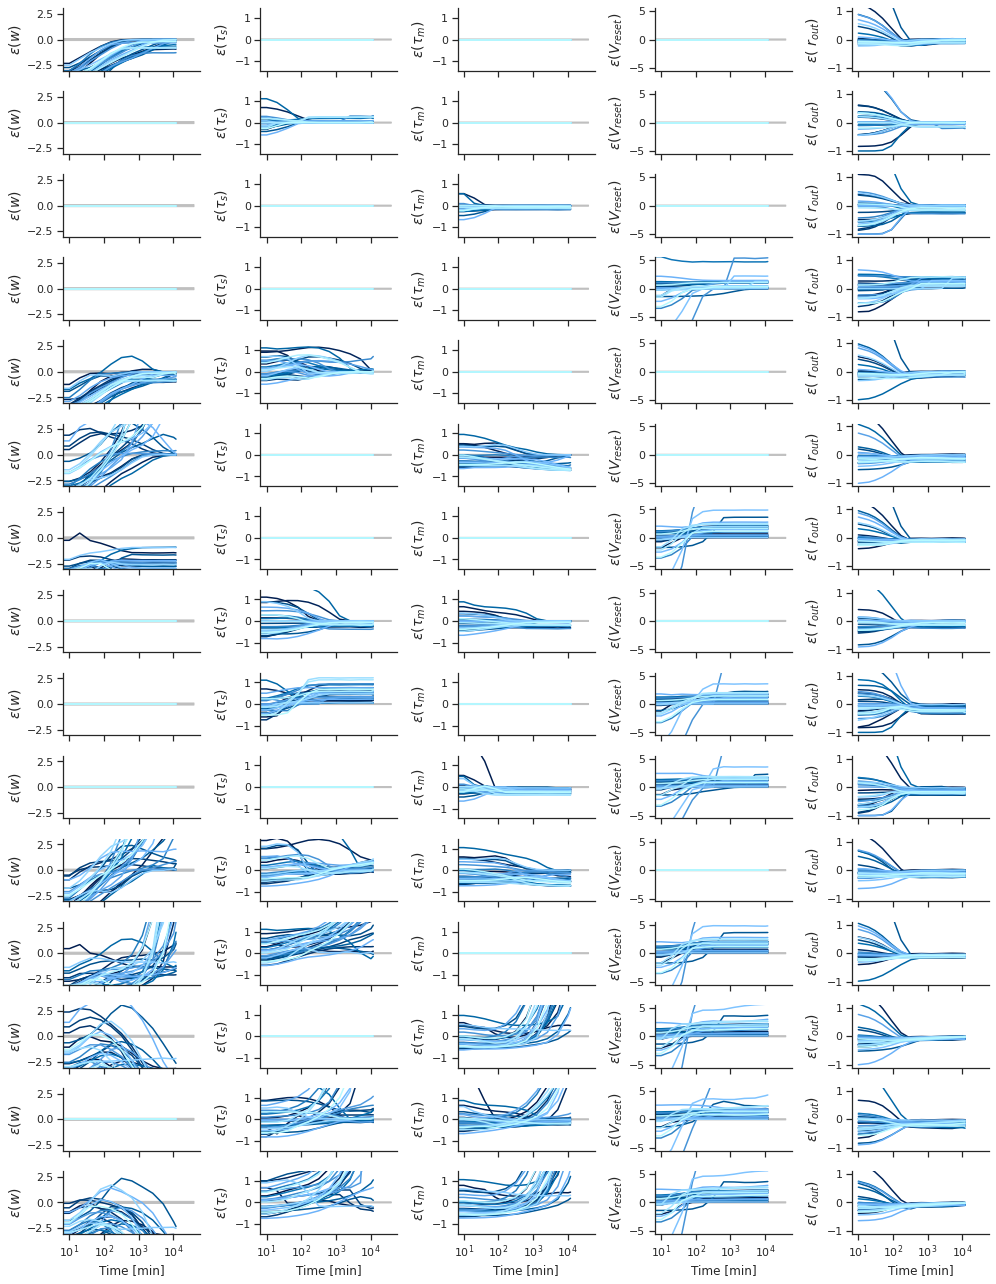

In [3]:
# Load data and plot
seeds_n = 30
fs = 14

sns.set_palette(sns.color_palette("flare", n_colors=seeds_n))

sns.set_palette(['#001649', '#001d50', '#002359', '#002a61', '#00316a', '#003872', '#00407a',
                 '#004783', '#004f8b', '#005694', '#005e9d', '#0066a5', '#006dae', '#0e75b7',
                 '#227cbf', '#3084c7', '#3b8bcf', '#4593d7', '#4f9adf', '#59a2e8', '#62aaf0',
                 '#6bb2f9', '#74bafe', '#7ec3ff', '#88ccff', '#91d5ff', '#9bdeff', '#a5e7ff',
                 '#aef0ff', '#b7f9ff'])

fig, axs = plt.subplots(15, 5, figsize=(14, 18.), sharex=True)
for n, comb in enumerate(combinations(4, False)):
    prefix = "".join(["1" if x else "0" for x in comb])
    data = dl.DataLoader("../figure4/a/results/", "mode_1_" + prefix).merge()

    training_steps = len(data["tau_s"][0]) * 10

    x = np.linspace(0., training_steps, len(data["tau_s"][0]))

    idx = np.asarray([0] + [2**n for n in range(11)] + [1198])
    for i in range(data["ws"].shape[0]):
        scatter_x = data["ws"][i].shape[1] * 1.1
        axs[n, 0].semilogx(x[idx], dist(data["ws"][i].T, data["ws_target"][i])[idx])
        axs[n, 1].semilogx(x[idx], dist(data["tau_s"][i], data["tau_s_target"][i])[idx])
        axs[n, 2].semilogx(x[idx], dist(data["tau_m"][i], data["tau_m_target"][i])[idx])
        axs[n, 3].semilogx(x[idx], dist(data["v_reset"][i], data["v_reset_target"][i])[idx])
        axs[n, 4].semilogx(x[1:][idx], dist(lpf(data["firing_rate"][i][1:], 0.1), data["firing_rate_target"][i])[idx])
        
    axs[n, 0].set_ylim([-3.05, 3.05])
    axs[n, 1].set_ylim([-1.45, 1.45])
    axs[n, 2].set_ylim([-1.45, 1.45])
    axs[n, 3].set_ylim([-5.5, 5.5])
    axs[n, 4].set_ylim([-1.1, 1.1])

    for i in [0, 3]:
        axs[n, i].fill_between(x * 3.3, 0.1, -0.1, color=[0.75, 0.75, 0.75])
    for i in [1, 2]:
        axs[n, i].fill_between(x * 3.3, 0.025, -0.025, color=[0.75, 0.75, 0.75])  

    axs[n, 0].set_ylabel("$\epsilon (w)$", fontsize=fs)
    axs[n, 1].set_ylabel("$\epsilon (\\tau_s)$", fontsize=fs)
    axs[n, 2].set_ylabel("$\epsilon (\\tau_m)$", fontsize=fs)
    axs[n, 3].set_ylabel("$\epsilon (V_{reset})$ ", fontsize=fs)
    axs[n, 4].set_ylabel("$\epsilon (\ r_{out})$", fontsize=fs)

    for i in range(5):
        sns.despine(ax=axs[n, i])

for i in range(5):
    axs[14, i].set_xlabel("Time [min]")
    axs[14, i].set_xticks([10., 100., 1000., 10000.])

fig.tight_layout()

fig.savefig("appendix-surrogate-trajectories.pdf", pad_inches=0.)